In [46]:
import graph_tool.all as gt
import numpy as npr
import numpy.random as npr
from numpy.linalg import norm
from pylab import *

In [71]:
                                       #importing data

mass, lum, mag= loadtxt('new_data.txt', usecols=(2,3,4), unpack=True, skiprows=2)



                                     #building the graph

g = gt.Graph(directed=False)
Mass = g.new_vertex_property('float')
Lum  = g.new_vertex_property('float')
Mag = g.new_vertex_property('float')
pos = g.new_vertex_property('vector<float>')
pos_ = g.new_vertex_property('vector<float>')


In [72]:
g.vp.mass=Mass
g.vp.lum = Lum
g.vp.mag = Mag
g.vp.pos = pos
g.vp.pos_ = pos_

In [73]:
                                      #global parameters

N=800

global init_foot, ibin


a=1
b=0 

prop=g.vp.mag

mag =mag[0:N]
lum =lum[0:N]
mass =mass[0:N]

init_foot = 0.003
ibin =      0.003
fbin =      0.21

foot = (init_foot)*(10**a)
BIN = ibin - foot*b

draw = True

In [74]:
min(mag), max(mag)


(3.589477, 4.862083)

In [75]:
min(lum), max(lum)

(5.343182, 6.001361)

In [76]:

min(mass), max(mass)

(12.495226, 59.949995)

In [77]:
#minmax scaling
mag -= min(mag); mag /= max(mag)

lum -= min(lum); lum /= max(lum)

mass -= min(mass); mass /= max(mass)

In [78]:
min(mag), max(mag)

(0.0, 1.0)

In [79]:
min(lum), max(lum)

(0.0, 1.0)

In [80]:
min(mass), max(mass)

(0.0, 1.0)

In [81]:
                                       #applying properties


v = g.add_vertex(N)

for i, v in enumerate(g.vertices()):
    g.vp.mass[v]=mass[i]
    g.vp.lum[v]=lum[i]
    g.vp.mag[v]=mag[i]
    g.vp.pos[v] = np.array([mag[i],lum[i]]).T


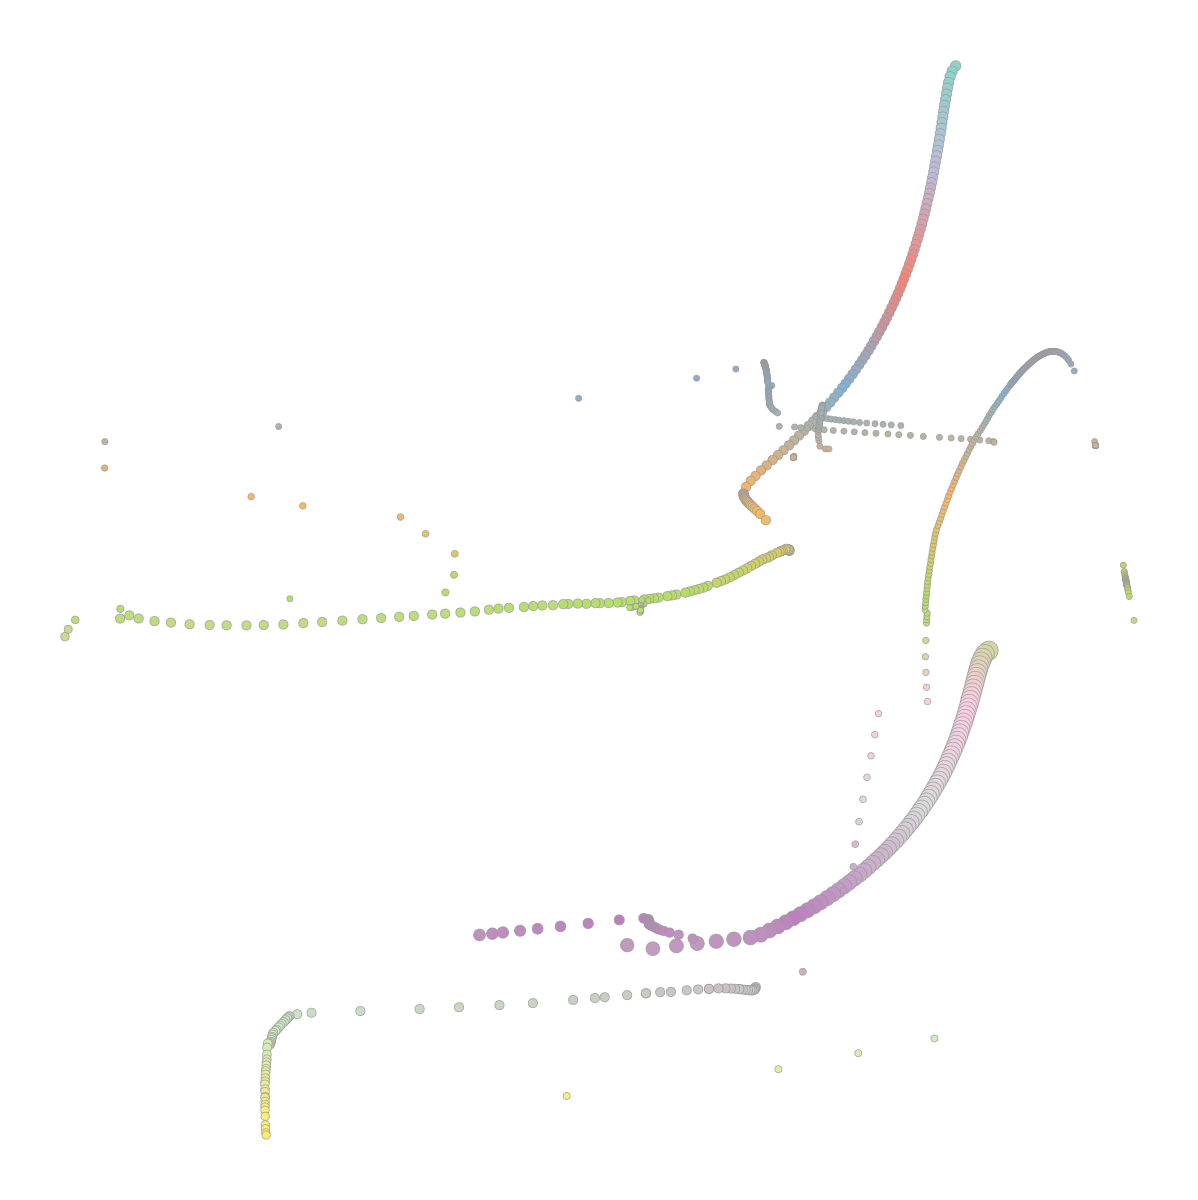

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f488872b310, at 0x7f4888731a60>

In [82]:
gt.graph_draw(g, pos=g.vp.pos, vertex_fill_color=g.vp.lum,vertex_size=gt.prop_to_size(g.vp.mass, mi=3, ma=9.5, log=False, power=2))

In [83]:
posv=np.array([g.vp.pos[i] for i in range(0, N)])

In [84]:
gg, gpos = gt.geometric_graph(posv, ibin)

In [85]:
gu = gt.graph_union(gg, g, intersection=g.vertex_index, internal_props=True)

In [86]:
gu.copy_property(gpos, tgt=gu.vp.pos_, g=gg)

In [87]:
gu.vp.pos_ = gt.sfdp_layout(gu, pos=gu.vp.pos_, K=1.5)

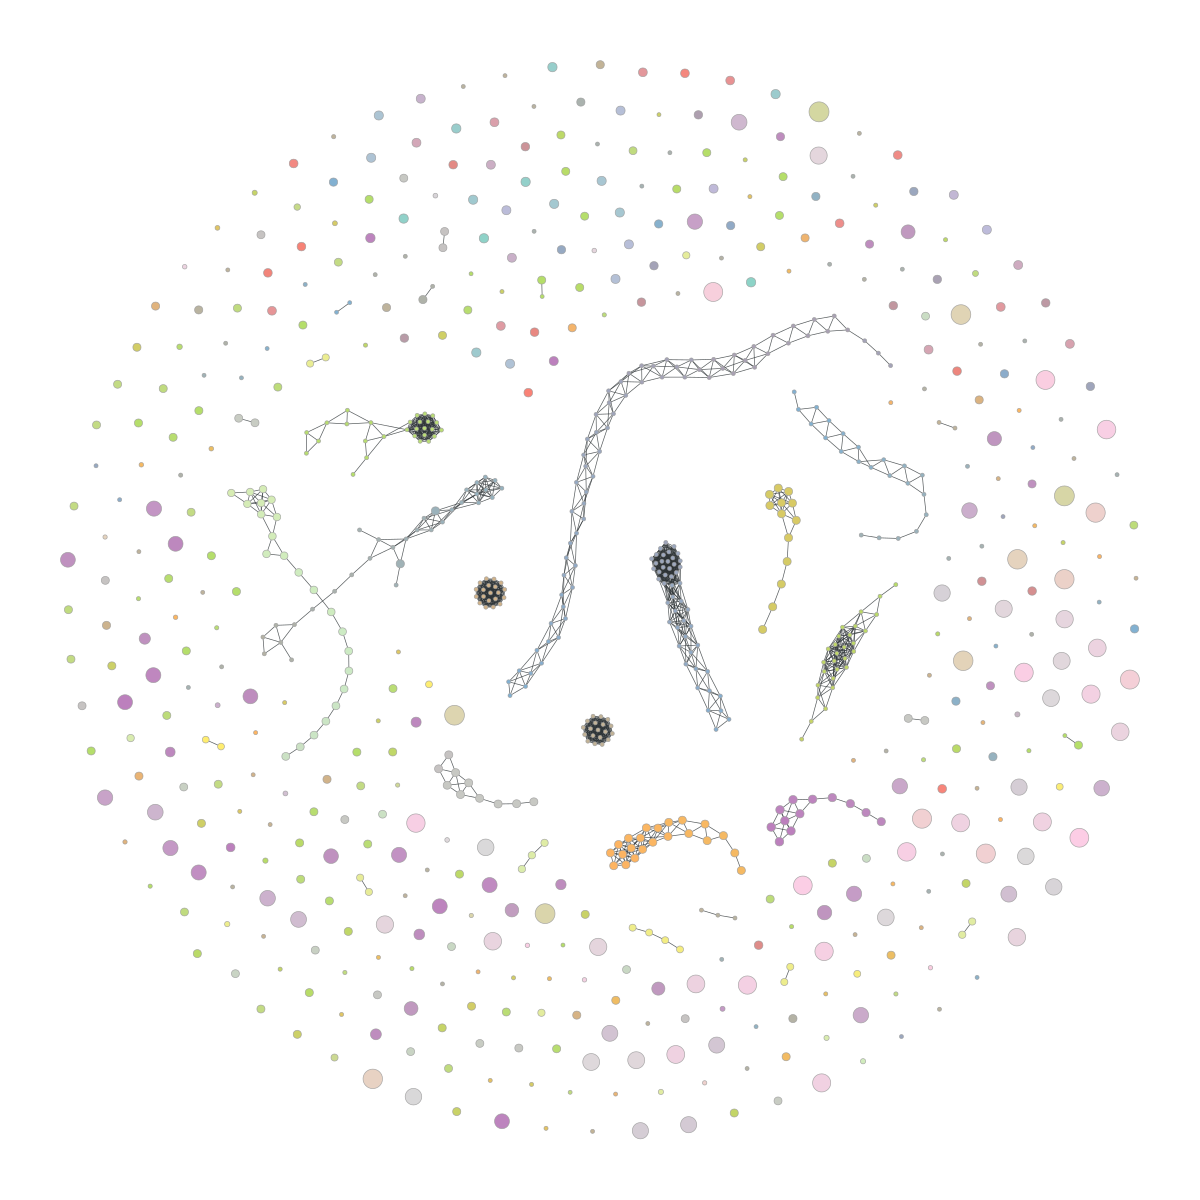

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f489b0f7ca0, at 0x7f489b0fa1c0>

In [89]:
gt.graph_draw(gu, pos=gu.vp.pos_, vertex_fill_color=gu.vp.lum,vertex_size=gt.prop_to_size(gu.vp.mass, mi=2, ma=10, log=False, power=2))

In [90]:
def make_gif(g, points, a, b, step):
    bin = a
    g.vp.pos_ = gt.sfdp_layout(g, pos=g.vp.pos, K=1.5)
    graphs = [g]
    while bin <= b:
        gg, gpos = gt.geometric_graph(points, bin)

        gu=graphs[-1].copy()
        ggedgelist=gg.get_edges()
        guedgelist=gu.get_edges()
        for edge in ggedgelist:
            if not(edge in guedgelist):
                gu.add_edge(edge[0], edge[1]) 
        gu.vp.pos_ = gt.sfdp_layout(gu, pos=gu.vp.pos_, max_iter=8, init_step=0.5, K=1.5)
        graphs.append(gu)
        
        bin+=step
    return graphs


In [43]:
graphlist = make_gif(gu, posv, ibin,fbin, init_foot);

In [44]:
for i, gu in enumerate(graphlist):
    gt.graph_draw(gu, pos=gu.vp.pos_, vertex_fill_color=gu.vp.lum,edge_color= "white", edge_pen_width=0.5, vertex_size=gt.prop_to_size(gu.vp.mass, mi=2, ma=10, log=False, power=2), output="draw %i.png" %i)

In [45]:
from IPython.display import HTML